In [15]:
import pickle
import os
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [16]:
i=0
connect_path = "../../../connection_pairs_"+str(i)+".pkl"  
feat_path = "../../../features_"+str(i)+".pkl"
label_path = "../../../labels_"+str(i)+".pkl"

In [17]:
with open(connect_path, "rb") as file:
    connection_pairs = pickle.load(file)
with open(feat_path, "rb") as file:
    features = pickle.load(file)
with open(label_path, "rb") as file:
    labels = pickle.load(file)

In [18]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.int32)

In [19]:
def plot_graph(edges, labels, bs):

    num_nodes = len(edges)

    # for i in range(num_nodes):
    #     for j in range(i + 1, num_nodes):  # Exclude diagonal and symmetric entries
    #         if adjacency_matrix[i, j] != 0:
    #             edges.append((i, j))
    ed= [(edge[0], edge[1]) for edge in edges]
    #labels = {0: '0', 1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6'}
    labels_color= {0:'blue', 1:'navy', 2:'green',3:'yellow', 4:'orange', 5: 'navy',
                  6: 'pink', 7:'purple', 8:'grey', 9:'salmon'}
    graph = nx.Graph(ed)
    node_labels = [labels[node].item() for node in graph.nodes()]
    node_colors = [labels_color[node_label] for node_label in node_labels]
    print(node_colors)
    pos = nx.random_layout(graph)  # Specify the layout for node positions
    #pos = nx.planar_layout(graph)
    nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False)
    plt.show()
    # plt.savefig("../../graph_bs_"+str(bs)+".png")
    # plt.close()


['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


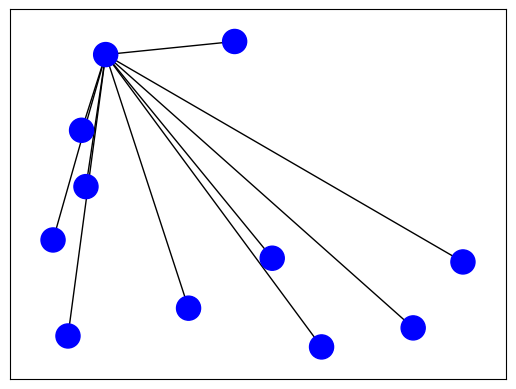

In [20]:
plot_graph(connection_pairs[:10], labels, i)

In [21]:
labels

tensor([[0],
        [0],
        [0],
        ...,
        [8],
        [8],
        [8]], dtype=torch.int32)

In [22]:
features_ = features.reshape(len(features), 3, 32, 32)

In [23]:
import matplotlib.pyplot as plt

def visualize_per_node_connections(features, connections, labels):
    fs_title =25
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 4, 1)
    print(connections[0][0])
    img = features[connections[0][0], :, :, :].permute(1, 2 , 0)
    plt.imshow(img)
    plt.title('Node',fontsize=2*fs_title, weight='bold')

    for i in range(0, 10):
        plt.subplot(3, 4, i + 2)
        connected_to_idx = connections[i][1]
        img = features[connected_to_idx, :, :, :].permute(1 , 2, 0)
        plt.imshow(img)
        plt.title('Connected to '+str(connected_to_idx)+'\n Label '+str(labels[connected_to_idx].item()),fontsize=fs_title, weight='bold' )

    plt.show()


700


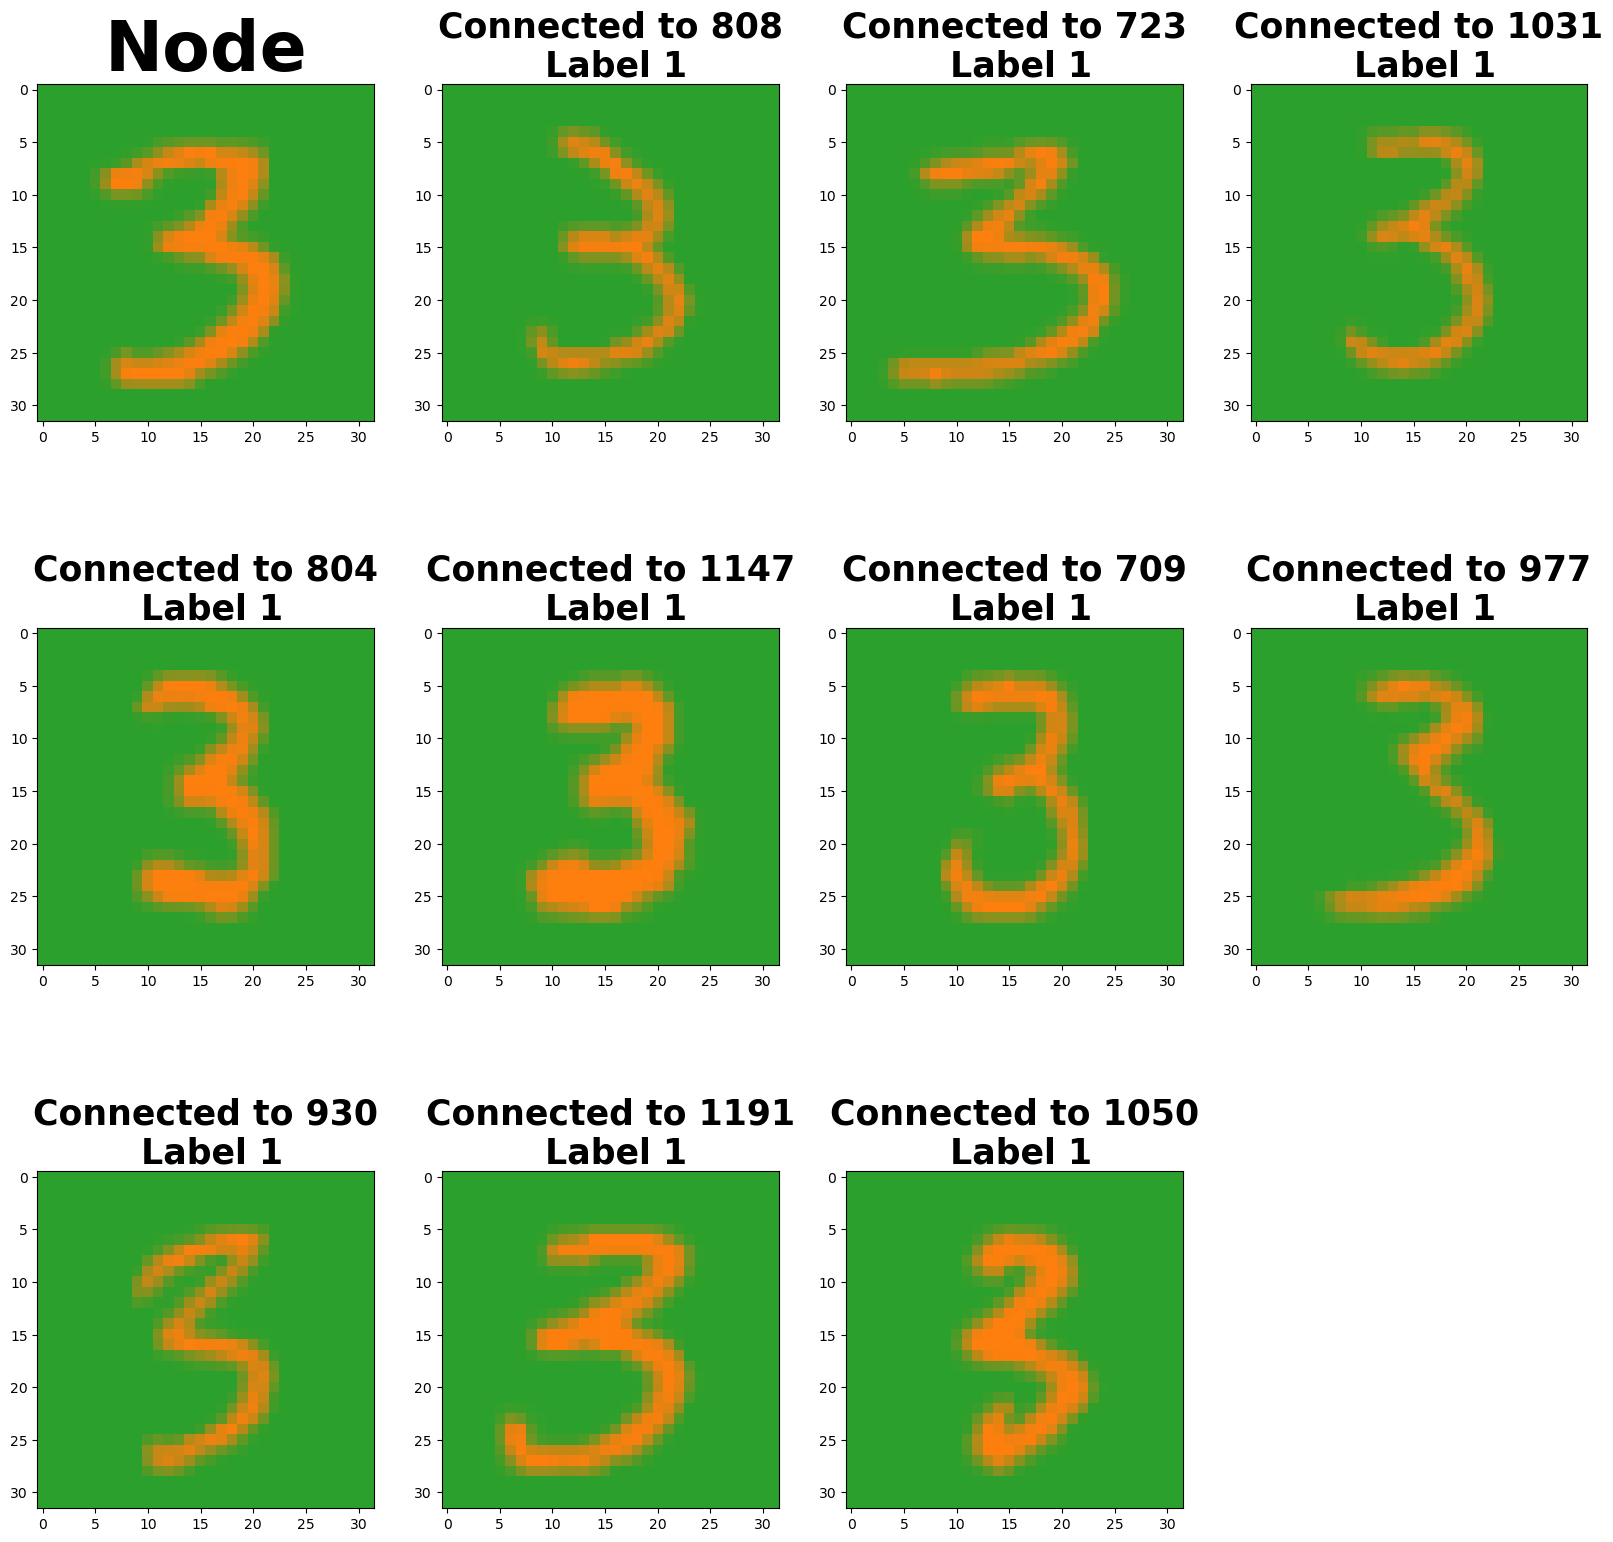

In [26]:
visualize_per_node_connections(features_, connection_pairs[7000:7010], labels)